In [1]:
import xarray as xr
from glob import glob 
import numpy as np
datas = glob("../data/*hdf")

ds = xr.open_dataset(datas[0], engine='netcdf4')
df = ds.to_dataframe().reset_index()
df['ydim'] = df['ydim'].astype('float') 
df['xdim'] = df['xdim'].astype('float') 
df['ydim'] = df['ydim'] - (np.max(df['ydim'])/2)
df['ydim'] = df['ydim']*-1
df['xdim'] = df['xdim'] - (np.max(df['xdim'])/2)

df.head()

/opt/anaconda3/envs/playground/lib/python3.9/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


ydim   xdim  NDVI  EVI  perc_fill_value  perc_good_pixels
0  89.5 -179.5   NaN  NaN            100.0               0.0
1  89.5 -178.5   NaN  NaN            100.0               0.0
2  89.5 -177.5   NaN  NaN            100.0               0.0
3  89.5 -176.5   NaN  NaN            100.0               0.0
4  89.5 -175.5   NaN  NaN            100.0               0.0

In [2]:
import os, sys
sys.path.append('../')
from data_functions import degree2radians, mapping_map_to_sphere, process_df, get_XYZV, create_spherical_heatmap_vals, get_lines

tdf = process_df(df, None, 'ydim', 'xdim')
tdf.head()

ydim   xdim  NDVI  EVI  perc_fill_value  perc_good_pixels         X  \
0  89.5 -179.5   NaN  NaN            100.0               0.0 -0.008726   
1  89.5 -178.5   NaN  NaN            100.0               0.0 -0.008724   
2  89.5 -177.5   NaN  NaN            100.0               0.0 -0.008718   
3  89.5 -176.5   NaN  NaN            100.0               0.0 -0.008710   
4  89.5 -175.5   NaN  NaN            100.0               0.0 -0.008700   

          Y         Z  
0 -0.000076  0.999962  
1 -0.000228  0.999962  
2 -0.000381  0.999962  
3 -0.000533  0.999962  
4 -0.000685  0.999962

In [3]:
tdf['NDVI'] = tdf['NDVI'].replace(np.nan,0)
tdf.shape

(64800, 9)

In [4]:
xyzv = get_XYZV(tdf, 'NDVI')
XX, YY, ZZ, WW = create_spherical_heatmap_vals(xyzv)

In [5]:
from scipy.ndimage import gaussian_filter


In [13]:
import cartopy.feature as cf
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=XX, y=YY, z=ZZ, surfacecolor=gaussian_filter(WW, sigma=2), opacity=1)] )

#fig = go.Figure(data=[go.Scatter3d(x=xyzv[:,0], y=xyzv[:,1],z=xyzv[:,2], mode='markers')])

for x,y,z in [get_lines(g) for g in [cf.COASTLINE.geometries, cf.BORDERS.geometries] ]:
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, showlegend=False, hoverinfo='skip', mode='lines', line = dict(color='black', width=4)))

#fig.add_trace(go.Scatter3d(x=xyzv[:,0], y=xyzv[:,1],z=xyzv[:,2], mode='markers'))


fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )
fig.show()

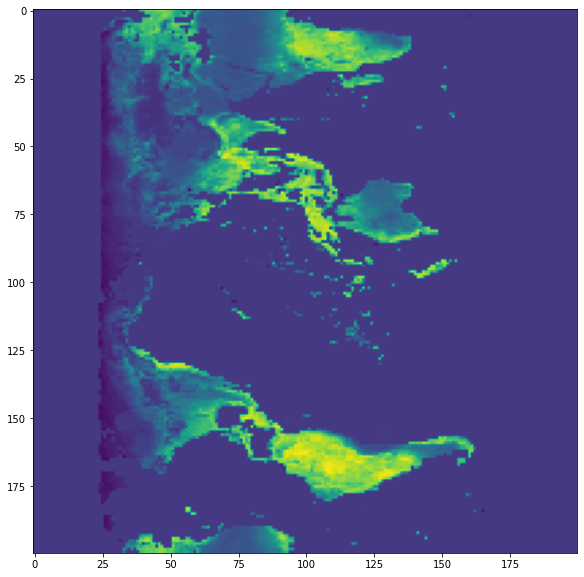

In [8]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(WW)